# **Netflix TV Shows and Movies**

# **NETFLIX TV SHOWS AND MOVIES**

>**Instrução para execução**

Adicionar o arquivo titles.csv na pasta content. O arquivo está na pasta zip do trabalho ou pode ser obtido também no link https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies 
Após incluir o arquivo, execute todas as células

> **Introdução**

Nesse trabalho vamos analisar um banco de dados de Filmes e Séries da Netflix com informações referentes a avalição do público, número de temporadas, país de origem, classificação indicativa, ano de lançamento, duração e gênero.

> **Motivação**

A motivação para a escolha do tema foi devido ao interesse em entender relação entre as produções de filmes e séries e sua a popularização entre os seus expectadores. Sendo assim, iremos utilizar uma base de dados que lista todos os shows disponíveis no streaming Netflix em Maio 2022, analisando, por exemplo, como o gênero, o lançamento e tempo de duração podem impactar na recepção da produção pelo público.

> **Perguntas de Pesquisa**



*  Existe relação entre o ano de lançamento de um filme e seu IMDB Score?
*   É possível afirmar que filmes/séries do gênero comédia e filmes/séries do gênero romance possuem o mesmo TMDB Score?
*   A média das notas (IMDB Score) dos dois gêneros com mais filmes/series (comédia e drama) é igual?
*   O número de temporadas da série influencia no seu TMDB Popularity?










# **Metodologia**


Esse banco de dados foi criado para listar todos os shows disponíveis no streaming Netflix e analisar os dados para encontrar fatos interessantes. Esse banco foi obtido em Maio de 2022 contendo informações disponíveis nos Estados Unidos.

In [ ]:
from scipy import stats as ss
from numpy.testing import assert_equal

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

Como pode ser observado abaixo o banco de dados contém colunas referentes a:


*   ID: contendo um valor único correspondente a um determinado filme ou série
*   Título: contendo o nome referente a um determinado filme ou série
*   Tipo: determina se a produção é um filme ou uma série de TV
*   Descrição: contendo uma breve sinopse da obra
*   Ano de Lançamento
*   Classificação Indicativa
*   Tempo de Duração (em minutos)
*   Gênero: quando uma obra se encaixa em mais de um gênero, eles são colocados em tuplas
*   País de produção
*   Temporadas: quando a produção é um filme ou uma série que não possui temporadas atribui-se o valor NaN
*   ID IMDb (Internet Movie Database): contendo um valor único correspondente a um determinado filme e série no IMDb
*   Pontuação IMDb: contendo a avalição da produção no IMBd (caso o filme ou a série não tenha uma pontuação atribui-se o valor NaN)
*   Votos IMDb: contendo o número de votos do público que avaliou a produção no IMDb
*   Popularidade TMDb (The Movie Database): contendo a média de visualizações/notas por dia
*   Pontuação TMDb: contendo a avalição da produção no TMDb (caso o filme ou a série não tenha uma pontuação atribui-se o valor NaN)














In [ ]:
df = pd.read_csv('/content/titles.csv', index_col=0)
df.head()

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
id,,,,,,,,,,,,,,
ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


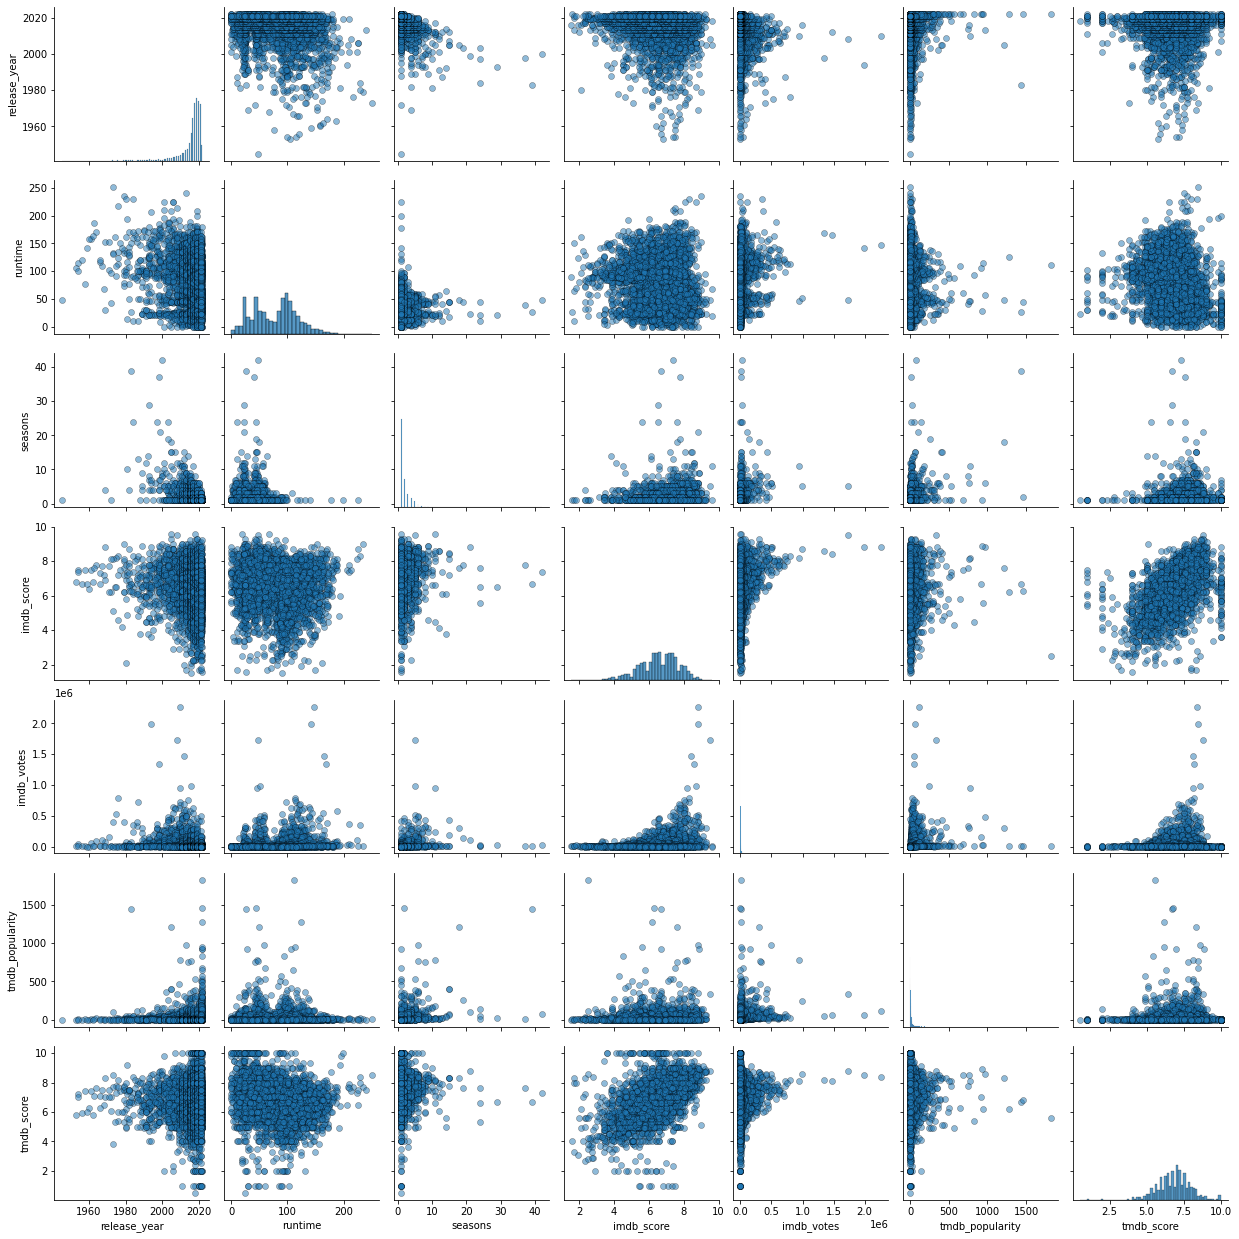

In [ ]:
sns.pairplot(df, diag_kws={'edgecolor':'k'}, plot_kws={'alpha':0.5, 'edgecolor':'k'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


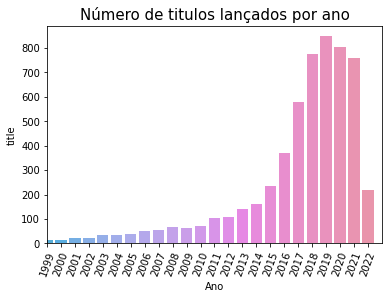

In [ ]:
lancamento = (df.groupby('release_year')
              .agg({'title': 'count'})
              .reset_index()
              .rename(columns={'title':'m'}))

sns.barplot(
    lancamento['release_year'],
    lancamento['m'],
)

plt.title("Número de titulos lançados por ano", fontsize=15)
plt.xlabel('Ano')
plt.xlim(right=67) 
plt.xlim(left=43) 
plt.xticks(rotation=70)
plt.ylabel('title')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


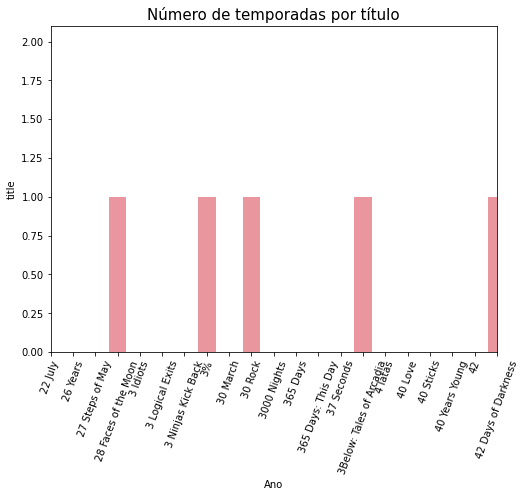

In [ ]:
lancamento = (df.groupby('title')
              .agg({'seasons': 'count'})
              .reset_index()
              .rename(columns={'seasons':'m'}))

sns.barplot(
    lancamento['title'],
    lancamento['m'],
)

plt.title("Número de temporadas por título", fontsize=15)
plt.xlabel('Ano')
plt.xlim(right=60) 
plt.xlim(left=40) 
plt.xticks(rotation=70)
plt.ylabel('title')
plt.show()

# **Métodos e Modelos Utilizados**

> **Regressão Linear**

É um método utilizado para estimar o valor de uma váriavel (dependente) com base no valor de outra variável (independente). 

Na pergunta 1, utilizamos esse método porque queríamos saber se há relação entre lançamentos e avaliação no IMDb, ou seja, se determinados anos tinham melhor avaliação no IMDb em relação a lançamentos de outros anos, verificando assim se existem épocas melhores para lançar filmes/séries visando obter uma maior pontuação entre os espectadores.

Na pergunta 4, adotamos esse método novamente pois queríamos analisar a relação entre o número de temporadas e a Popularidade TMDb, isto é, analisar se séries com mais temporadas tendem a serem mais poupulares que séries com menos temporadas, e vice-versa. 

Dessa forma, como desejamos saber a relação entre duas váriaveis, indicadas acima, escolhemos empregar a Regressão Linear, uma vez que ela nos fornece essa resposta.

> **Teste de Hipótese**

É um método que nos permitem rejeitar ou não rejeitar uma hipótese estatística através da evidencia fornecida pela amostra.

Na pergunta 2, utilizamos esse método porque queríamos descobrir se a pontuação dos gêneros comédia e romance para filmes/séries é semelhante, uma vez que existem muitos filmes que são comédias românticas, o objetivo era analisar se, por esse motivo, as pessoas que assistem produções do gênero romance avaliam produções do gênero comédia de maneira similar.

Dessa forma, como nossa hipótese era que as notas do TMDB são semelhantes para ambos os gêneros, escolhemos o Teste de Hipótese para verficar a vericidade dessa afirmação ou negá-la caso seja falsa.

> **Teste A/B**

É um método que compara dois grupos, sendo um de controle e outro de tratamento de uma experiência controlada. O método implementado utiliza bootstrap para obter novas amostras e comparar os dois grupos

Na pergunta 3, utilizamos esse método porque queríamos comparar a avaliação IMDb de dois grupos de filmes/séries, um deles sendo do gênero comédia e o outro drama. Escolhemos esse gêneros pois eles são os dois que possuem mais produções no banco de dados.

Dessa forma, como queríamos fazer a comparação entre dois grupos usamos o Teste A/B.





**Pergunta 1:**

Existe relação entre o ano de lançamento de um filme e seu IMDB Score? (regressão linear)

primeiramente, selecionamos os dados, escolhendo os filmes, data de lançamento (eixo x) e a pontuação no IMDb (eixo y).

A partir disso, obtemos um gráfico de dispersão representando os dados acima descritos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  


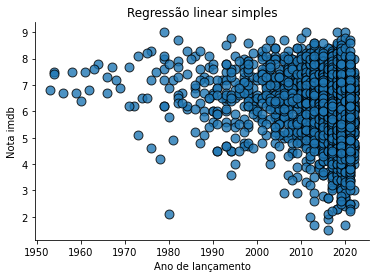

In [ ]:
data = df[df['type'] == 'MOVIE']
p1 = data.dropna(0, subset = ['release_year', 'imdb_score'])

y = p1['imdb_score'].values
x = p1['release_year'].values

plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.xlabel('Ano de lançamento')
plt.ylabel('Nota imdb')
plt.title('Regressão linear simples')
despine()

em seguida, fazemos uma regressão de vizinhos próximos. Para tal agrupamos os pontos mais próximos do eixo x e tiramos a média do eixo y

In [ ]:
copy = p1[['release_year', 'imdb_score']].copy()
copy['imdb_score'] = copy['imdb_score'].round()
model = copy.groupby('release_year').mean()
model.head()

,imdb_score
release_year,
1953,7.0
1954,7.5
1956,7.0
1958,8.0
1959,7.0


Logo depois, plotamos o gráfico e observamos o modelo obtido




Text(0.5, 1.0, 'Regressão linear simples')

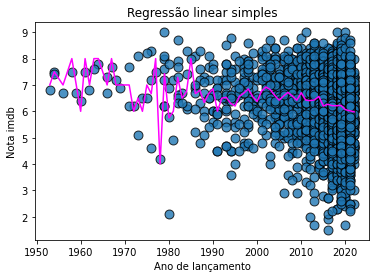

In [ ]:
x_nn = model.index
y_nn = model.values
plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(x_nn, y_nn, color='magenta')
plt.xlabel('Ano de lançamento')
plt.ylabel('Nota imdb')
plt.title('Regressão linear simples')

Implementamos a função least_squares_fit que escolhe o alpha e o beta que minimizam a soma dos erros quadrados

In [ ]:
#Escolhe o alfa e o beta que tornam a soma dos erros quadrados a menor possivel
def least_squares_fit(x, y):
  correlationxy = ss.pearsonr(x, y)[0]
  beta = correlationxy * np.std(y, ddof=1) / np.std(x, ddof=1)
  alpha = np.mean(y) - beta * np.mean(x)
  return alpha, beta

Plotamos o gráfico com o alpha e o beta adquiridos

Text(0.5, 1.0, 'Regressão linear simples')

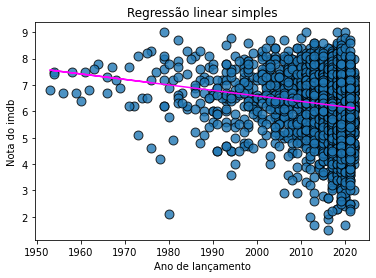

In [ ]:
y = p1['imdb_score'].values
x = p1['release_year'].values

alpha, beta = least_squares_fit(x, y)

y_model = beta * x + alpha

plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(x, y_model, color='magenta')
plt.xlabel('Ano de lançamento')
plt.ylabel('Nota do imdb')
plt.title('Regressão linear simples')

desenvolvemos as funções necessárias para achar o R^2

In [ ]:
def r_squared(alpha, beta, x, y):
  r2 = 1.0 - (sum_of_squared_errors(alpha, beta, x, y) / ((y - y.mean()) ** 2).sum())
  return r2

def error(alpha, beta, x, y):
  y_model = beta * x + alpha
  erro = y - y_model
  return erro

def sum_of_squared_errors(alpha, beta, x, y):
  error2 = error(alpha, beta, x, y) ** 2
  error2 = error2.sum()
  return error2

In [ ]:
R2 = r_squared(alpha, beta, x, y)
print('Coeficiente de determinação:' , R2)

Coeficiente de determinação: 0.023563121072847526


In [ ]:
print(r_squared(alpha, beta, x, y) ** 0.5, ss.pearsonr(x, y)[0])

0.15350283734461564 -0.1535028373446156


Observamos que o R^2 é muito próximo de 0. Ele mede a fração da variação total na variável dependente. Isso nós indica que temos um modelo fraco e que não se ajusta adaquadamente aos valores, o que significa que existem outros fatores entre a relação Ano de Lançamento e a Nota do Imdb.

**Pergunta 2:**

É possível afirmar que filmes/séries do gênero comédia e filmes/séries do gênero romance possuem o mesmo TMDB Score? (Teste de Hipótese)

*   *Hipótese nula:* os filmes/séries do gênero comédia e filmes/séries do gênero romance possuem o mesmo TMDB Score
*   *Hipótese alternativa:* os filmes/séries do gênero comédia e filmes/séries do gênero romance possuem o TMDB Score diferentes

In [ ]:
p2 = df[(df['genres'].isin(["['comedy']", "['romance']"]))]

Como devemos testar de acordo com a hipotese nula, o TMDB para comedia e romance são iguais, iremos remover o fator Genero da equação para podermos comparar 

In [ ]:
def shuffling(data):
  N = 5000
  filtro = data['genres'] == "['comedy']"
  t_obs = data[filtro]['tmdb_score'].mean() - data[~filtro]['tmdb_score'].mean()
  diffs = np.zeros(N)
  for i in range(N):
    np.random.seed(i)
    np.random.shuffle(filtro.values)
    diffs[i] = data[filtro]['tmdb_score'].mean() - data[~filtro]['tmdb_score'].mean()
  return diffs

diffs = shuffling(df)

Calcular os valores criticos

In [ ]:
LI = np.percentile(diffs, 2.5)
LS = np.percentile(diffs, 97.5)
print(LI,LS)

-0.11201423984779324 0.10986031476539863


Agora, calculamos o p-valor que consiste na probablilidade de valores superiores ou inferiores ao da estatistica de teste

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
p = p2[p2['genres'].isin(["['comedy']"])].mean()['tmdb_score']
q = p2[p2['genres'].isin(["['romance']"])].mean()['tmdb_score']
t_obs = q - p
p_value = 0
ecdf = ECDF(diffs)
p = ecdf(t_obs)
if t_obs < np.percentile(diffs,50):
  p_value = p
else:
  p_value =  1 - p

print('Hipotese nula é: ', (ecdf(t_obs) < 0.05))
print(p_value)

Hipotese nula é:  True
0.0


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


A partir dos cálculo feitos, obtemos p_value, que, por possuir um valor baixo, podemos concluir que a hipótese nula é verdadeira e que, portanto ambos os generos têm o mesmo TMDb score

**Pergunta 3:**

A média das notas (IMDB Score) dos dois gêneros com mais filmes/series (comédia e drama) é igual? (Teste A/B)

Primeiramente, tratamos os dados selecionando as colunas certas e tirando os valores Nan

In [ ]:
#Tratamento dos dados

comedia = df[df['genres']== "['comedy']"]
comedia = comedia.dropna(0,subset = ['imdb_score'])

drama = df[df['genres']=="['drama']"]
drama = drama.dropna(0,subset = ['imdb_score'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  import sys


em seguida, realizamos o bootstrap da média e gera amostras para cada grupo (A, B). No vetor diferença, guarda-se a diferença da média das amostras

In [ ]:
def bootstrap_mean(df1, df2, column, n=10000):
    size1 = len(df1)
    size2 = len(df2)
    values1 = np.zeros(n)
    values2 = np.zeros(n)
    values_diff = np.zeros(n)
    for i in range(n):
        sample1 = df1[column].sample(size1, replace=True, random_state=i)
        sample2 = df2[column].sample(size2, replace=True, random_state=i*3)
        values1[i] = sample1.mean()
        values2[i] = sample2.mean()
        values_diff[i] = sample2.mean() - sample1.mean()
    return values1, values2, values_diff

col = 'imdb_score'
v_comedia, v_drama, v_diff = bootstrap_mean(comedia, drama, col)

Plotamos, então, os boxplots de cada grupo e avaliamos a intersecção da amplitude dos valores para cada gênero

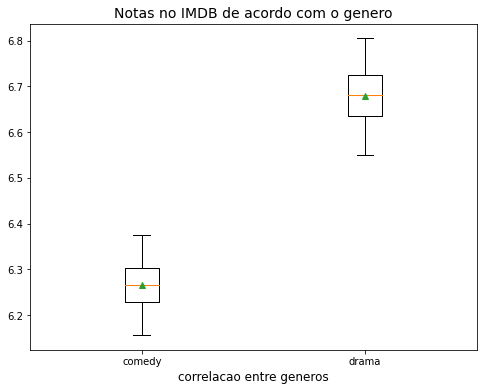

In [ ]:
bp_data = [v_comedia, v_drama]

plt.rcParams['figure.figsize']  = (8, 6)
plt.boxplot(bp_data, whis=[2.5, 97.5], positions=[1,2], showfliers=False, showmeans=True)
plt.xticks([1,2], ['comedy', 'drama'], fontsize=10)
plt.ylabel('', fontsize=13)
plt.xlabel('correlacao entre generos', fontsize=12)
plt.title('Notas no IMDB de acordo com o genero', fontsize=14)
plt.show()

Podemos observar no gráfico acima que os boxplots não se cruzam, e evidenciamos que a média das notas de IMDb para o gênero drama é maior que para o gênero comédia

Uma outra maneira de observar esse resultado é por meio do bloxplot abaixo que mostra a diferença entre as médias a cada amostragem bootstrap feita 

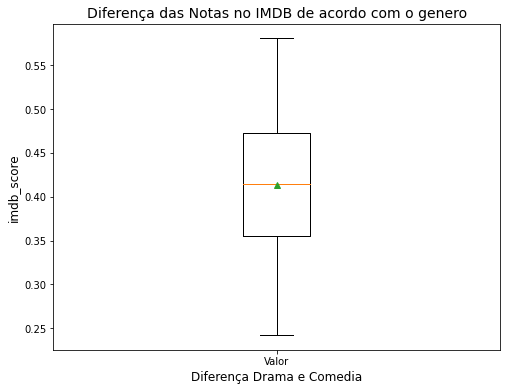

In [ ]:
plt.rcParams['figure.figsize']  = (8, 6)

plt.boxplot(v_diff, whis=[2.5, 97.5], showfliers=False, showmeans=True)
plt.xticks([1], ['Valor'], fontsize=10)
plt.ylabel(col, fontsize=12)
plt.xlabel('Diferença Drama e Comedia', fontsize=12)
plt.title('Diferença das Notas no IMDB de acordo com o genero', fontsize=14)
plt.show()

Se as médias fossem iguais, esse bootstrap iria contar o valor zero como não é o caso, podemos afirmar que a média das notas para drama são maiores que para comédia

Nessa questão queremos testar se existe uma diferença entre média do IMBD Score dos gêneros comédia e drama. Para isso, utilizamos o Teste A/B para verificar o problema, aplicando o Bootstrap. Ao plotar o resultado obtido podemos observar que as médias são diferentes, uma vez que os boxplots não se cruzam. Além disso, também é possível perceber que a média das notas no IMDB de filmes e séries do gênero drama é maior que a do gênero comédia. Por fim, foi realizada uma segunda plotagem, dessa vez com a diferença entre as médias. Nesse último gráfico, chegamos a mesma conclusão anterior, isto é, como a diferença entre a média das notas não é igual a zero, sabe-se que elas não são iguais, como pode ser observado acima.

**Pergunta 4:**

O número de temporadas da série influencia no seu TMDB Popularity? (Regressão Linear)

primeiramente, selecionamos os dados, escolhendo os filmes, data de lançamento (eixo x) e a pontuação no IMDb (eixo y).

A partir disso, obtemos um gráfico de dispersão representando os dados acima descritos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  


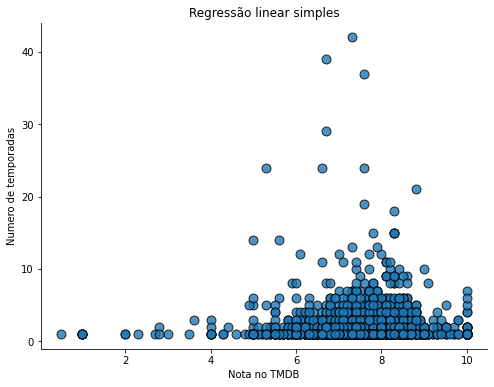

In [ ]:
data = df[df['type'] == 'SHOW']
data = data.dropna(0, subset = ['seasons', 'tmdb_score'])
y = data['seasons'].values
x = data['tmdb_score'].values

plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.xlabel('Nota no TMDB')
plt.ylabel('Numero de temporadas')
plt.title('Regressão linear simples')
despine()

In [ ]:
copy = data[['tmdb_score','seasons']].copy()
copy.dropna(0,subset = ['tmdb_score','seasons'])
copy['tmdb_score'] = copy['tmdb_score'].round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  


em seguida, fazemos uma regressão de vizinhos próximos. Para tal agrupamos os pontos mais próximos do eixo x e tiramos a média do eixo y

In [ ]:
model = copy.groupby('tmdb_score').mean()
model.head()

,seasons
tmdb_score,
0.0,1.00
1.0,1.00
2.0,1.00
3.0,1.25
4.0,1.50


Logo depois, plotamos o gráfico e observamos o modelo obtido




Text(0.5, 1.0, 'Regressão linear simples')

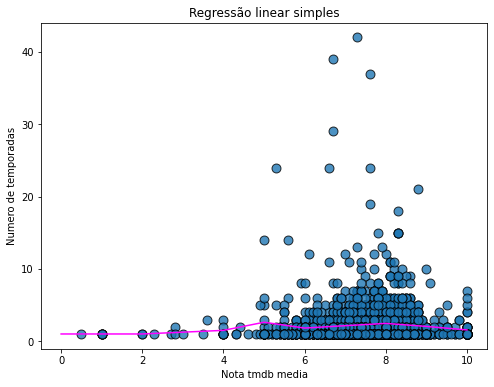

In [ ]:
x_nn = model.index
y_nn = model.values
plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(x_nn, y_nn, color='magenta')
plt.xlabel('Nota tmdb media')
plt.ylabel('Numero de temporadas')
plt.title('Regressão linear simples')

Implementamos a função least_squares_fit que escolhe o alpha e o beta que minimizam a soma dos erros quadrados

In [ ]:
def least_squares_fit(x, y):
  correlationxy = ss.pearsonr(x, y)[0]
  beta = correlationxy * np.std(y, ddof=1) / np.std(x, ddof=1)
  alpha = np.mean(y) - beta * np.mean(x)
  return alpha, beta

Plotamos o gráfico com o alpha e o beta adquiridos

Text(0.5, 1.0, 'Regressão linear simples')

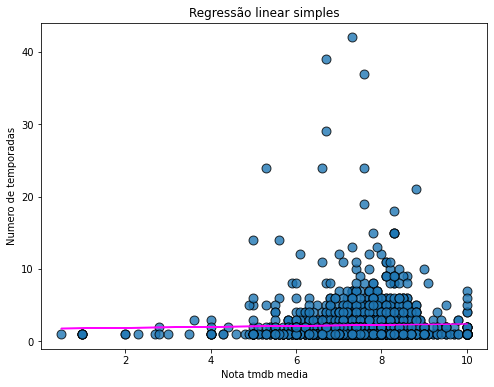

In [ ]:
y = data['seasons'].values
x = data['tmdb_score'].values

alpha, beta = least_squares_fit(x, y)

y_model = beta * x + alpha

plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(x, y_model, color='magenta')
plt.xlabel('Nota tmdb media')
plt.ylabel('Numero de temporadas')
plt.title('Regressão linear simples')


desenvolvemos as funções necessárias para achar o R^2

In [ ]:
def r_squared(alpha, beta, x, y):
  r2 = 1.0 - (sum_of_squared_errors(alpha, beta, x, y) / ((y - y.mean()) ** 2).sum())
  return r2

def error(alpha, beta, x, y):
  y_model = beta * x + alpha
  erro = y - y_model
  return erro

def sum_of_squared_errors(alpha, beta, x, y):
  error2 = error(alpha, beta, x, y) ** 2
  error2 = error2.sum()
  return error2

In [ ]:
R2 = r_squared(alpha, beta, x, y)
print('Coeficiente de determinação:' , R2)

Coeficiente de determinação: 0.0007180248919599341


In [ ]:
print(r_squared(alpha, beta, x, y) ** 0.5, ss.pearsonr(x, y)[0])

0.026795986489769958 0.02679598648977144


Observamos como o R^2 é muito próximos de 0. Isso nós indica que temos um modelo fraco e que não se ajusta adaquadamente aos valores, o que indica que existem outros fatores entre número de temporadas da série e sua TMDB Popularity.

# **PREVISÕES E CONCLUSÕES**

No início do trabalho enquanto formulávamos as perguntas acreditavamos que os resultados obtidos após o tratamento dos dados seriam:

Pergunta 1: Pensavamos que não existia uma relação entre o ano de lançamento e a popularização dos filmes/séries, isso porque todos anos existem muitas produções cinematógraficas que fazem sucesso e muitas que não fazem, isto é, que recebem avaliações positivas do público ou que obtem notas baixas dos espectadores. Após aplicarmos a Regressão Linear e obtermos a resposta para a pergunta, verificamos que nossa previsão estava correta.

Pergunta 2: Pensavamos que, por existir uma relação de igualdade no nosso dia a dia entre filmes/séries do gênero comédia e do gênero romance (comédias românticas), isso implicaria em notas semelhantes para ambos os gêneros, uma vez que acreditavamos que pessoas que gostam de comédia também gostariam de romance, pelo motivo mencionado acima (das comédias românticas). Após implementar o teste de Hipótese comprovamos que a nossa previsão estava correta.

Pergunta 3: Pensavamos que, por se tratar de dois gêneros muito opostos  (comédia e drama), que, em geral, atraem públicos diferentes, as avaliações do IMDb seriam bem distintas. Essa previsão se mostrou verdadeira após aplicarmos o Teste A/B, uma vez que percebemos que não existe uma relação entre a média das notas para filmes/séries desses gêneros.

Pergunta 4: Pensavamos que o número de temporadas de uma série teria relação com a sua popularidade (TMDB Popularity), uma vez que, em muitos casos, séries com mais temporadas tendem a ser adoradas pelo público, motivo pelo qual são sempre renovadas para novas temporadas. Essa previsão se mostrou falsa ao implementarmos a Regressão Linear pois chegamos a conclusão que não existe essa relação direta, visto que existem outros fatores que impactam nessa popularidade.